## Test patching code to find bugs and edge cases

This uses Ryan's patching code from week 4 (and eventually its updates by the coding team) to create patches on annotated slices

First test on non-annotated slices (original extracts), then add in class annotations

Uses a few randomly selected images from different stains in `/testing_slices` directory, plus one three-slice match to test across stains

In [13]:
import nbimporter
from Contour_Normal_Gridding import normal_squares_from_contour

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [16]:
# get binary image from original image file (white background)
def get_binary_image(image_path):
    """
    Reads an image from the given path, converts it to grayscale,
    and returns a binary thresholded image.

    Parameters:
        image_path (str): Path to the input image.

    Returns:
        np.ndarray: Binary (thresholded) image.
    """
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image was successfully loaded
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    
    # Convert to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply binary threshold
    _, whole_thresh = cv2.threshold(image_gray, 1, 255, cv2.THRESH_BINARY) 
    
    return image, whole_thresh

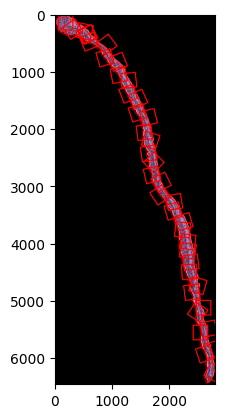

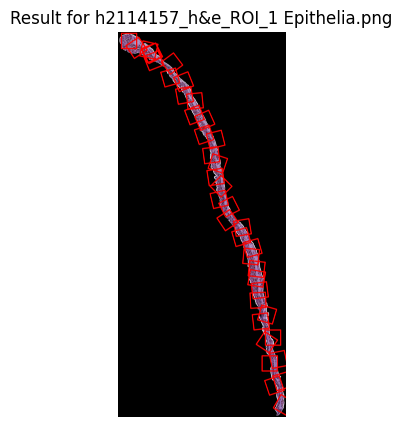

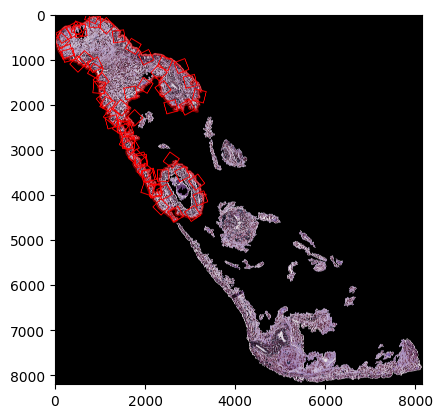

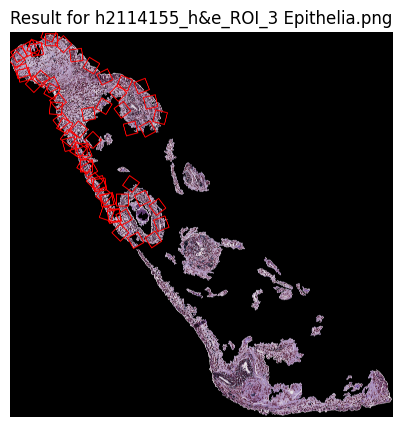

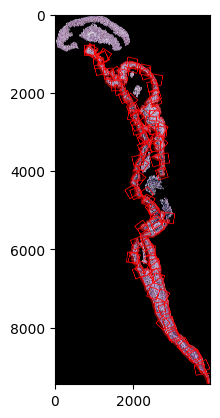

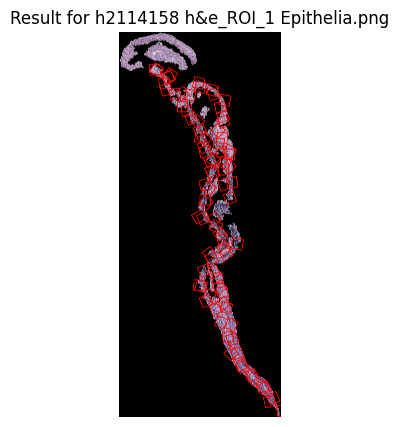

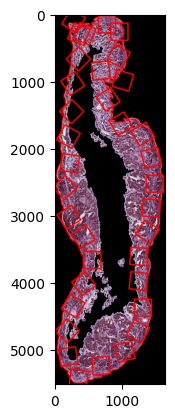

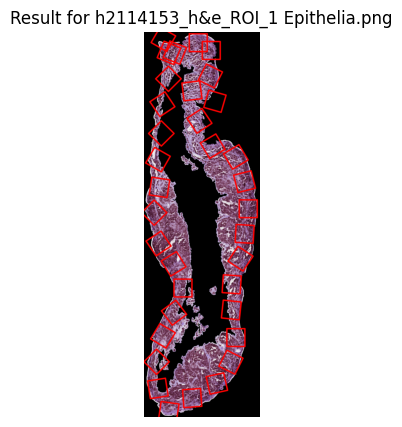

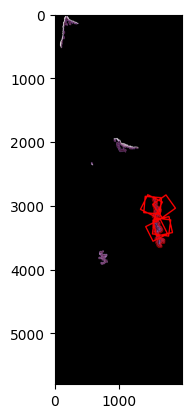

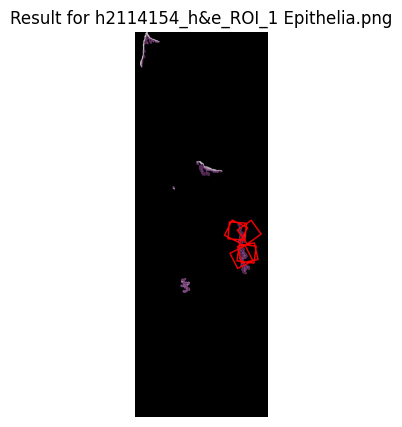

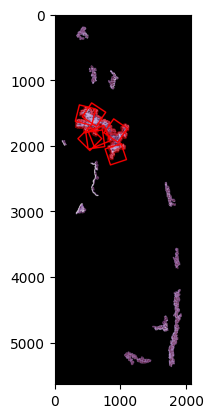

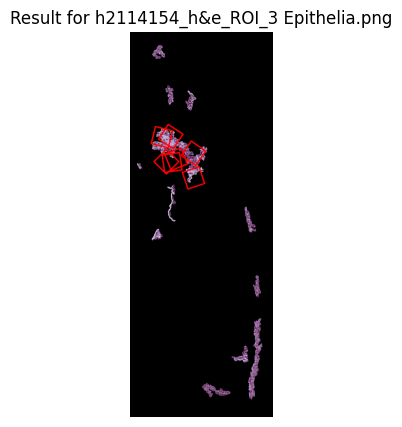

In [23]:
# test on testing_slices folder

# load images from testing directory
image_folder = './testing_slices'
image_files = [f for f in os.listdir(image_folder) if f.endswith('.png')]

# apply binary then patching to images
for img_file in image_files:

    img_path = os.path.join(image_folder, img_file)

    # convert to binary
    img, img_binary = get_binary_image(img_path)

    # apply patching
    result_image, contour, squares = normal_squares_from_contour(
     img,
     img_binary,
     square_size=256,
     step=5,
     overlap_thresh=0.01,
     smoothing_size=2
     )
    
    plt.figure(figsize=(10, 5))
    plt.imshow(result_image, cmap='gray')
    plt.title(f'Result for {img_file}')
    plt.axis('off')
    plt.show()
    plt.close()
